# 1.커피지수 - 전처리

In [2]:
import numpy as np
import pandas as pd
from glob import glob
import os
import warnings
warnings.filterwarnings('ignore')

In [203]:
df_list = r'D:\workspace\2.DataAnalysis\07.Cartogram\카페지수\소상공인시장진흥공단_상가(상권)정보_20211231'
allfile_list = glob(os.path.join(df_list, '소상공인시장진흥공단_*'))

alldata =[]
for file in allfile_list:
    df = pd.read_csv(file)
    alldata.append(df)


In [204]:
df = pd.concat(alldata)
df.shape

(2190348, 39)

In [205]:
df = df[['상호명','상권업종중분류코드','시도명','시군구명']]
df.head()

,상호명,상권업종중분류코드,시도명,시군구명
0,동그라미중고타이어,D23,강원도,강릉시
1,세인트존스호텔Ohcrab,O01,강원도,강릉시
2,평창라마다호텔,O01,강원도,평창군
3,호텔탑스텐스카이라운지,O01,강원도,강릉시
4,레이디가구,D15,강원도,원주시


In [206]:
df = df[df.상권업종중분류코드 == 'Q12']
print(df.shape)
df.head()

(101346, 4)


,상호명,상권업종중분류코드,시도명,시군구명
13,키즈까페아이사랑,Q12,강원도,강릉시
39,힐링,Q12,강원도,원주시
56,드롭탑,Q12,강원도,속초시
78,SHIMS,Q12,강원도,원주시
84,상유재카페,Q12,강원도,정선군


In [207]:
df['스타벅스'] = df.상호명.str.contains('스타벅스').astype(int)
df['커피빈'] = df.상호명.str.contains('커피빈').astype(int)
df['이디야'] = df.상호명.str.contains('이디야').astype(int)
df['빽다방'] = df.상호명.str.contains('빽다방|백다방').astype(int)
df.tail()

,상호명,상권업종중분류코드,시도명,시군구명,스타벅스,커피빈,이디야,빽다방
86624,카페,Q12,충청북도,보은군,0,0,0,0
86637,블랙보드방,Q12,충청북도,충주시,0,0,0,0
86677,마래,Q12,충청북도,청주시 흥덕구,0,0,0,0
86681,안부커피,Q12,충청북도,청주시 청원구,0,0,0,0
86687,710커피소매,Q12,충청북도,음성군,0,0,0,0


In [137]:
df2 = df.groupby(['시도명','시군구명'])[['스타벅스','커피빈','이디야','빽다방']].sum()
df2

스타벅스  커피빈  이디야  빽다방
시도명  시군구명                        
강원도  강릉시         4    0   17    2
     고성군         1    0    0    0
     동해시         1    1    1    1
     삼척시         0    0    5    1
     속초시         4    0    9    0
...            ...  ...  ...  ...
충청북도 청주시 상당구     4    1    8    2
     청주시 서원구     4    0    7    5
     청주시 청원구     3    0    8    5
     청주시 흥덕구     8    0   17    6
     충주시         4    0    8    3

[251 rows x 4 columns]

In [145]:
df2['커피지수']=round((df2.스타벅스 + df2.커피빈) / (df2.이디야 + df2.빽다방),2)
df2

스타벅스  커피빈  이디야  빽다방  커피지수
시도명  시군구명                              
강원도  강릉시         4    0   17    2  0.21
     고성군         1    0    0    0   inf
     동해시         1    1    1    1  1.00
     삼척시         0    0    5    1  0.00
     속초시         4    0    9    0  0.44
...            ...  ...  ...  ...   ...
충청북도 청주시 상당구     4    1    8    2  0.50
     청주시 서원구     4    0    7    5  0.33
     청주시 청원구     3    0    8    5  0.23
     청주시 흥덕구     8    0   17    6  0.35
     충주시         4    0    8    3  0.36

[251 rows x 5 columns]

In [144]:
df2.스타벅스.sum(),df2.이디야.sum(),df2.커피빈.sum(),df2.빽다방.sum()

(1503, 2065, 254, 758)

- inf값 삭제

In [146]:
#inf값 0으로 대체
df2['커피지수'] = df2['커피지수'].replace([np.inf],np.nan)  
df2.head()

스타벅스  커피빈  이디야  빽다방  커피지수
시도명 시군구명                           
강원도 강릉시      4    0   17    2  0.21
    고성군      1    0    0    0   NaN
    동해시      1    1    1    1  1.00
    삼척시      0    0    5    1  0.00
    속초시      4    0    9    0  0.44

In [147]:
df2.커피지수.fillna(0,inplace=True)
df2.head()

스타벅스  커피빈  이디야  빽다방  커피지수
시도명 시군구명                           
강원도 강릉시      4    0   17    2  0.21
    고성군      1    0    0    0  0.00
    동해시      1    1    1    1  1.00
    삼척시      0    0    5    1  0.00
    속초시      4    0    9    0  0.44

In [148]:
df2.isna().sum()

스타벅스    0
커피빈     0
이디야     0
빽다방     0
커피지수    0
dtype: int64

In [149]:
df2.reset_index(inplace=True)
df2.head()

,시도명,시군구명,스타벅스,커피빈,이디야,빽다방,커피지수
0,강원도,강릉시,4,0,17,2,0.21
1,강원도,고성군,1,0,0,0,0.00
2,강원도,동해시,1,1,1,1,1.00
3,강원도,삼척시,0,0,5,1,0.00
4,강원도,속초시,4,0,9,0,0.44


In [216]:
df2.to_csv('카페지수_전처리완료.csv')

# 2.커피지수 - ID 부여

In [152]:
pop = df2
len(pop.시군구명.unique())

229

In [214]:
tmp_gu_dict = {
    '수원': ['장안구', '권선구', '팔달구', '영통구'], 
    '성남': ['수정구', '중원구', '분당구'], 
    '안양': ['만안구', '동안구'], 
    '안산': ['상록구', '단원구'], 
    '고양': ['덕양구', '일산동구', '일산서구'], 
    '용인': ['처인구', '기흥구', '수지구'], 
    '청주': ['상당구', '서원구', '흥덕구', '청원구'], 
    '천안': ['동남구', '서북구'], 
    '전주': ['완산구', '덕진구'], 
    '포항': ['남구', '북구'], 
    '창원': ['의창구', '성산구', '진해구', '마산합포구', '마산회원구']
}


# ★여기가 문제인 것 같습니다!!★

In [221]:
metro_list = ['서울특별시','부산광역시','대구광역시','인천광역시','대전광역시','광주광역시','울산광역시']
si_name = [None] * len(pop)

for i in pop.index:
    if pop.시도명[i] in metro_list:
        if len(pop.시군구명[i]) == 2:
            si_name[i] = pop.시도명[i][:2] + ' ' + pop.시군구명[i]      # 서울 중구, 대전 서구
        else:
            si_name[i] = pop.시도명[i][:2] + ' ' + pop.시군구명[i][:-1]      # 서울 용산, 서울 서대문
    else:
        si_len = len(pop.시군구명[i].split())
        if si_len == 1:
            if pop.시군구명[i][:-1] == '고성':
                if pop.시도명[i] == '강원도':
                    si_name[i] = '고성(강원)'
                else:
                    si_name[i] = '고성(경남)'
            elif pop.시군구명[i].find('세종') == 0:
                si_name[i] = '세종'
            else:
                si_name[i] = pop.시군구명[i][:-1]         # 세종, 광명, 김포, 강릉
        else:
            admin_gu = pop.시군구명[i].split()[-1]
            for key, value in tmp_gu_dict.items():
                if admin_gu in value:
                    if len(admin_gu) == 2:
                        si_name[i] = key + ' ' + admin_gu      # 포항 북구, 포항 남구
                    elif len(admin_gu) == 5:
                        si_name[i] = key + ' ' + admin_gu[2:-1]    # 창원 합포, 창원 회원
                    else:
                        si_name[i] = key + ' ' + admin_gu[:-1]     # 수원 팔달, 용인 수지


# ★여기서부터 성남 수원 등 지도에 구멍나는 부분 값이 안보입니다!!★

In [209]:
print(si_name)  

['강릉', '고성(강원)', '동해', '삼척', '속초', '양구', '양양', '영월', '원주', '인제', '정선', '철원', '춘천', '태백', '평창', '홍천', '화천', '횡성', '가평', '과천', '광명', '광주', '구리', '군포', '김포', '남양주', '동두천', '부천', '시흥', '안성', '양주', '양평', '여주', '연천', '오산', '의왕', '의정부', '이천', '파주', '평택', '포천', '하남', '화성', '거제', '거창', '고성(경남)', '김해', '남해', '밀양', '사천', '산청', '양산', '의령', '진주', '창녕', '통영', '하동', '함안', '함양', '합천', '경산', '경주', '고령', '구미', '군위', '김천', '문경', '봉화', '상주', '성주', '안동', '영덕', '영양', '영주', '영천', '예천', '울릉', '울진', '의성', '청도', '청송', '칠곡', '광주 광산', '광주 남구', '광주 동구', '광주 북구', '광주 서구', '대구 남구', '대구 달서', '대구 달성', '대구 동구', '대구 북구', '대구 서구', '대구 수성', '대구 중구', '대전 대덕', '대전 동구', '대전 서구', '대전 유성', '대전 중구', '부산 강서', '부산 금정', '부산 기장', '부산 남구', '부산 동구', '부산 동래', '부산 부산진', '부산 북구', '부산 사상', '부산 사하', '부산 서구', '부산 수영', '부산 연제', '부산 영도', '부산 중구', '부산 해운대', '서울 강남', '서울 강동', '서울 강북', '서울 강서', '서울 관악', '서울 광진', '서울 구로', '서울 금천', '서울 노원', '서울 도봉', '서울 동대문', '서울 동작', '서울 마포', '서울 서대문', '서울 서초', '서울 성동', '서울 성북', '서울 송파', '서울 양천', '서울 영등포', '서울 용

In [210]:
pop['ID'] = si_name
pop.head()

,시도명,시군구명,스타벅스,커피빈,이디야,빽다방,커피지수,ID,y,x
0,강원도,강릉시,4,0,17,2,0.21,강릉,3,11
1,강원도,고성군,1,0,0,0,0.00,고성(강원),0,10
2,강원도,동해시,1,1,1,1,1.00,동해,4,11
3,강원도,삼척시,0,0,5,1,0.00,삼척,5,11
4,강원도,속초시,4,0,9,0,0.44,속초,1,10


In [211]:
pop.ID.unique()

array(['강릉', '고성(강원)', '동해', '삼척', '속초', '양구', '양양', '영월', '원주', '인제',
       '정선', '철원', '춘천', '태백', '평창', '홍천', '화천', '횡성', '가평', '과천', '광명',
       '광주', '구리', '군포', '김포', '남양주', '동두천', '부천', '시흥', '안성', '양주', '양평',
       '여주', '연천', '오산', '의왕', '의정부', '이천', '파주', '평택', '포천', '하남', '화성',
       '거제', '거창', '고성(경남)', '김해', '남해', '밀양', '사천', '산청', '양산', '의령',
       '진주', '창녕', '통영', '하동', '함안', '함양', '합천', '경산', '경주', '고령', '구미',
       '군위', '김천', '문경', '봉화', '상주', '성주', '안동', '영덕', '영양', '영주', '영천',
       '예천', '울릉', '울진', '의성', '청도', '청송', '칠곡', '광주 광산', '광주 남구',
       '광주 동구', '광주 북구', '광주 서구', '대구 남구', '대구 달서', '대구 달성', '대구 동구',
       '대구 북구', '대구 서구', '대구 수성', '대구 중구', '대전 대덕', '대전 동구', '대전 서구',
       '대전 유성', '대전 중구', '부산 강서', '부산 금정', '부산 기장', '부산 남구', '부산 동구',
       '부산 동래', '부산 부산진', '부산 북구', '부산 사상', '부산 사하', '부산 서구', '부산 수영',
       '부산 연제', '부산 영도', '부산 중구', '부산 해운대', '서울 강남', '서울 강동', '서울 강북',
       '서울 강서', '서울 관악', '서울 광진', '서울 구로', '서울 금천', '서울 노원', '서울 도봉',
 

# 3.커피지수 - 시각화

In [191]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus']=False
mpl.rcParams['font.family'] = 'Malgun Gothic'

In [213]:
pop.to_csv('커피지수_시군구 ID 부여.csv', encoding='euc-kr')

In [193]:
map_row = pd.read_excel('draw_korea_raw(2021).xlsx')
map_row

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,파주,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,NaN,고양 일산서,고양 덕양,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,김포,광명,서울 은평,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN
5,NaN,인천 강화,부천,안양 만안,서울 강서,서울 마포,서울 중구,서울 성동,서울 강동,여주,원주,삼척,NaN,NaN
6,NaN,인천 서구,인천 동구,안양 동안,서울 양천,서울 동작,서울 용산,서울 광진,서울 송파,이천,평창,울진,NaN,NaN
7,NaN,NaN,인천 계양,시흥,서울 금천,서울 영등포,서울 서초,서울 강남,성남 중원,광주,영월,영덕,NaN,NaN
8,NaN,NaN,인천 부평,안산 상록,서울 구로,서울 관악,과천,성남 분당,성남 수정,용인 수지,문경,봉화,NaN,울릉
9,NaN,인천 중구,인천 미추홀,안산 단원,군포,의왕,수원 권선,수원 영통,용인 기흥,용인 처인,안동,영양,NaN,NaN


In [194]:
map_row.stack()[:10]

0  7         철원
   8         화천
   9         양구
   10    고성(강원)
1  3         양주
   4        동두천
   5         연천
   6         포천
   7        의정부
   8         인제
dtype: object

In [195]:
map = pd.DataFrame(map_row.stack())
map.reset_index(inplace=True)
map.shape
map.head()

,level_0,level_1,0
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [196]:
map.columns = ['y','x','ID']
map.head()

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [197]:
from draw_map import BORDER_LINES, drawKorea, drawKoreaMinus

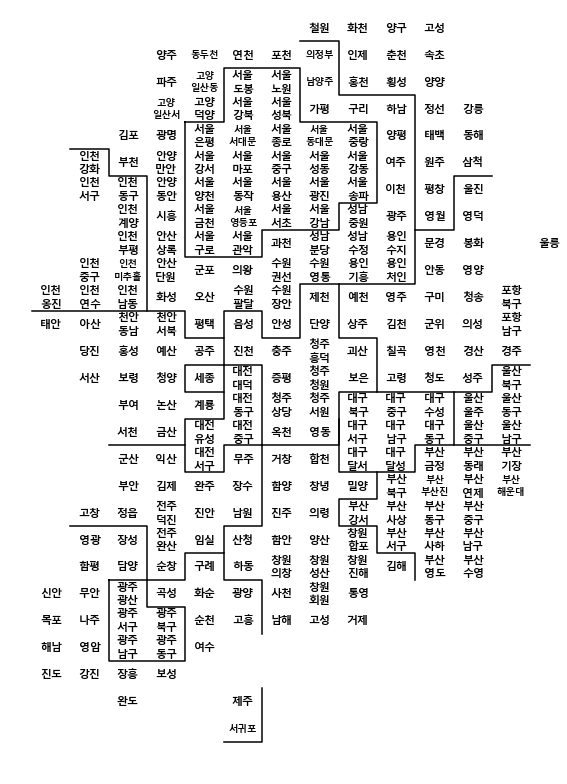

In [198]:
plt.figure(figsize=(8,11))

for idx, row in map.iterrows():
    # 광역시는 구 이름이 겹치는 경우가 많아서 광역시 이름도 같이 표시 
    # (중구, 서구 등)
    if len(row.ID.split())==2:
        dispname = f'{row.ID.split()[0]}\n{row.ID.split()[1]}'
    elif row.ID[:2]=='고성':
        dispname = '고성'
    else:
        dispname = row.ID

    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                 fontsize=fontsize, ha='center', va='center', 
                 linespacing=linespacing)
    
# 시도 경계
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=1.5)

plt.gca().invert_yaxis()
#plt.gca().set_aspect(1)

plt.axis('off')

plt.tight_layout()
plt.show()

In [199]:
pop = pd.merge(pop, map)
pop.head()

,시도명,시군구명,스타벅스,커피빈,이디야,빽다방,커피지수,ID,y,x
0,강원도,강릉시,4,0,17,2,0.21,강릉,3,11
1,강원도,고성군,1,0,0,0,0.00,고성(강원),0,10
2,강원도,동해시,1,1,1,1,1.00,동해,4,11
3,강원도,삼척시,0,0,5,1,0.00,삼척,5,11
4,강원도,속초시,4,0,9,0,0.44,속초,1,10


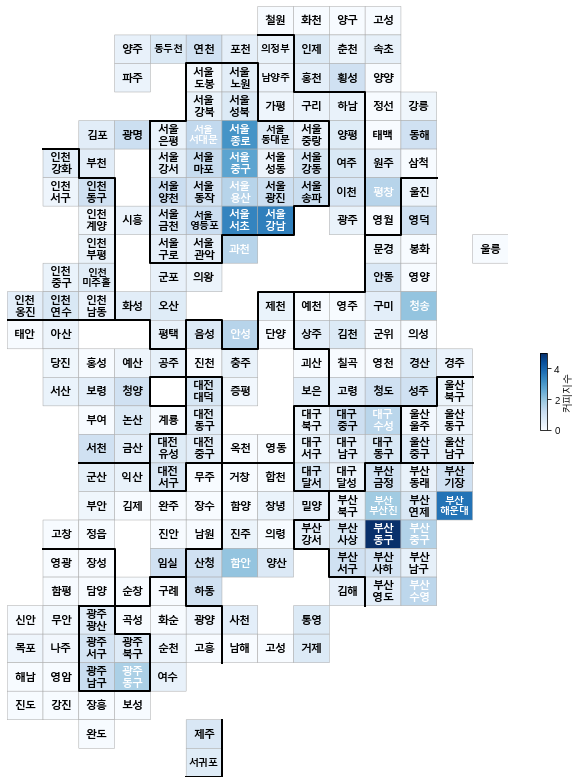

In [200]:
drawKorea('커피지수', pop, 'Blues')